# Business Understanding

The Seattle Airbnb Dataset ( listings, calendar, review) shows information about AirBnB accommodations in Seattle, their availability and the feedback shared by users of the platform . Based on this dataset, my goal is to address following inquiries

### Understandings of Price Seasonal and Usage trend:

1. Highlighting the seasonal patterns in pricing and accommodation usage trends?
2. Which neighborhoods experience the highest and lowest prices throughout the year?
3. How do property types within neighborhoods influence prices, particularly in the most expensive neighborhoods and for the most common property types?

### Price Prediction
4. Can we predict the price of a given listing? Which listing factors show the strongest correlation with price?


# Data Understanding

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from collections import Counter
%matplotlib inline

In [168]:
#import data
df_listing = pd.read_csv('./listings.csv')
df_calendar = pd.read_csv('./calendar.csv')
df_reviews = pd.read_csv('./reviews.csv')

In [169]:
#Show top 5 records of listing
df_listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [170]:
#show statistics of listing
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [171]:
#show top 5 records of calendar dataset
df_calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [172]:
#show statistics of calendar
df_calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [173]:
#show top 5 records of review
df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [174]:
#show statistics of review
df_reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


### Exploring datasets detail:

#### Calendar Dataset:
1. Showing # of col, row of the calendar dataset
2. Showing columns have missing data

In [175]:
# Describe dataset
print(df_calendar.shape)
print(df_calendar.isnull().sum())
print(df_calendar.describe(include='all'))

(1393570, 4)
listing_id         0
date               0
available          0
price         459028
dtype: int64
          listing_id        date available    price
count   1.393570e+06     1393570   1393570   934542
unique           NaN         365         2      669
top              NaN  2016-01-04         t  $150.00
freq             NaN        3818    934542    36646
mean    5.550111e+06         NaN       NaN      NaN
std     2.962274e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     3.258213e+06         NaN       NaN      NaN
50%     6.118244e+06         NaN       NaN      NaN
75%     8.035212e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


##### Conclusion: The price column is the only one with missing values, and these occur exclusively when the listing is unavailable

#### Listings Dataset

1. Showing # of col and row
2. Showing columns have missing data
3. Showing other detail of categorical variables

In [176]:
#Showing # of col and row
print(df_listing.shape)

(3818, 92)


In [177]:
# Showing columns have missing data
print(df_listing.isnull().sum())

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64


In [178]:
#Showing columns have missing data
df_listing.columns[df_listing.isnull().any()]

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'zipcode', 'property_type', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

In [179]:
#Describe listing dataset
print(df_listing.describe(include='all'))

                  id                          listing_url     scrape_id  \
count   3.818000e+03                                 3818  3.818000e+03   
unique           NaN                                 3818           NaN   
top              NaN  https://www.airbnb.com/rooms/241032           NaN   
freq             NaN                                    1           NaN   
mean    5.550111e+06                                  NaN  2.016010e+13   
std     2.962660e+06                                  NaN  0.000000e+00   
min     3.335000e+03                                  NaN  2.016010e+13   
25%     3.258256e+06                                  NaN  2.016010e+13   
50%     6.118244e+06                                  NaN  2.016010e+13   
75%     8.035127e+06                                  NaN  2.016010e+13   
max     1.034016e+07                                  NaN  2.016010e+13   

       last_scraped                    name  \
count          3818                    3818   
uniqu

##### Conclusion: The "experiences offered" column contains "None" for all rows.

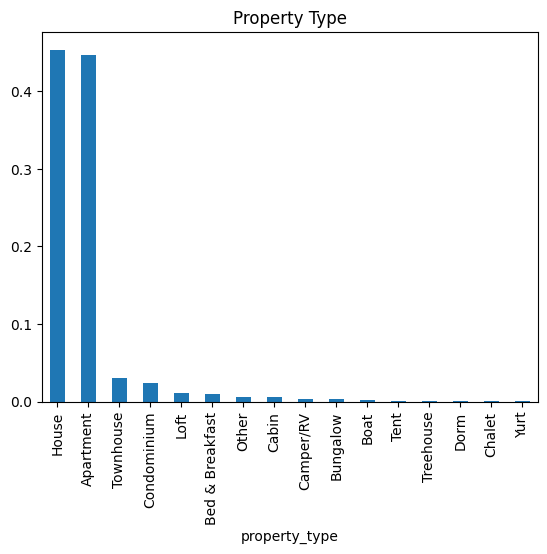

In [180]:
#property_type
property = df_listing['property_type'].value_counts()
(property/df_listing.shape[0]).plot(kind="bar");
plt.title("Property Type");

#### Review Dataset

1. Showing # of col, row of the dataset
2. showing columns having missing data
3. Showing other detail of categorical variables

In [181]:
#Showing # of col, row of the dataset
print(df_reviews.shape)

(84849, 6)


In [182]:
#showing columns having missing data
print(df_reviews.isnull().sum())

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


In [183]:
#Describe dataaset
print(df_reviews.describe(include='all'))

          listing_id            id        date   reviewer_id reviewer_name  \
count   8.484900e+04  8.484900e+04       84849  8.484900e+04         84849   
unique           NaN           NaN        1930           NaN         14380   
top              NaN           NaN  2015-09-21           NaN         David   
freq             NaN           NaN         580           NaN           870   
mean    3.005067e+06  3.058765e+07         NaN  1.701301e+07           NaN   
std     2.472877e+06  1.636613e+07         NaN  1.353704e+07           NaN   
min     4.291000e+03  3.721000e+03         NaN  1.500000e+01           NaN   
25%     7.946330e+05  1.725127e+07         NaN  5.053141e+06           NaN   
50%     2.488228e+06  3.228809e+07         NaN  1.413476e+07           NaN   
75%     4.694479e+06  4.457648e+07         NaN  2.762402e+07           NaN   
max     1.024814e+07  5.873651e+07         NaN  5.281274e+07           NaN   

                                                 comments  
cou

# Data Preparation

### Understandings of Price Seasonal and Usage trend:

1. Identifying the seasonal trends in pricing and accommodation usage patterns?
2. In which neighborhoods do prices peak and hit their lowest points throughout the year?
3. How do property types within neighborhoods affect prices, particularly in the priciest neighborhoods and for the most common property types?

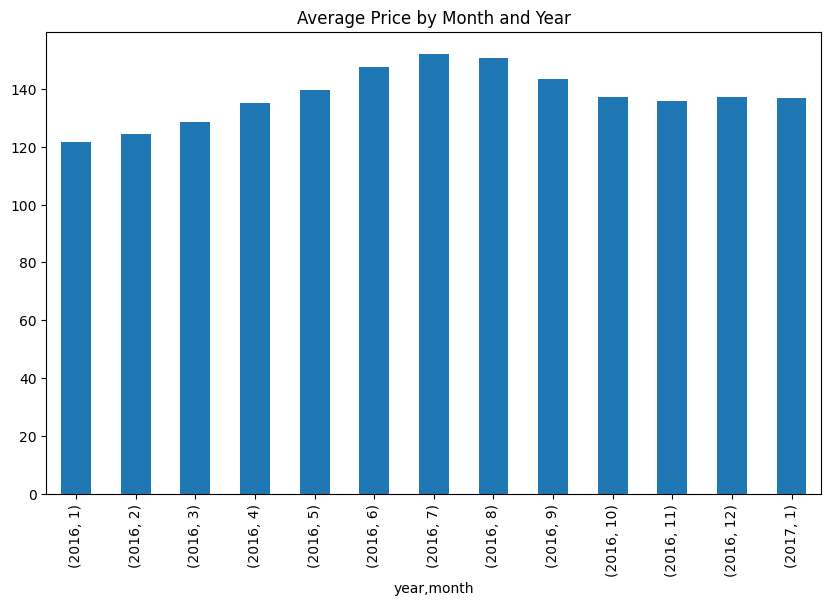

In [184]:
# Visualize Average Price by Month and Year
# Extracting year and month from the date column
df_calendar['year'] = pd.to_datetime(df_calendar['date']).dt.year
df_calendar['month'] = pd.to_datetime(df_calendar['date']).dt.month

# Cleaning and converting the price column to a numeric format
df_calendar['price'] = df_calendar['price'].str.replace('$', '', regex=False).replace(',', '', regex=True).astype(float)

# Calculating the average price by year and month, then plotting
df_calendar.groupby(['year', 'month'])['price'].mean().plot(kind="bar", figsize=(10, 6), title="Average Price by Month and Year");


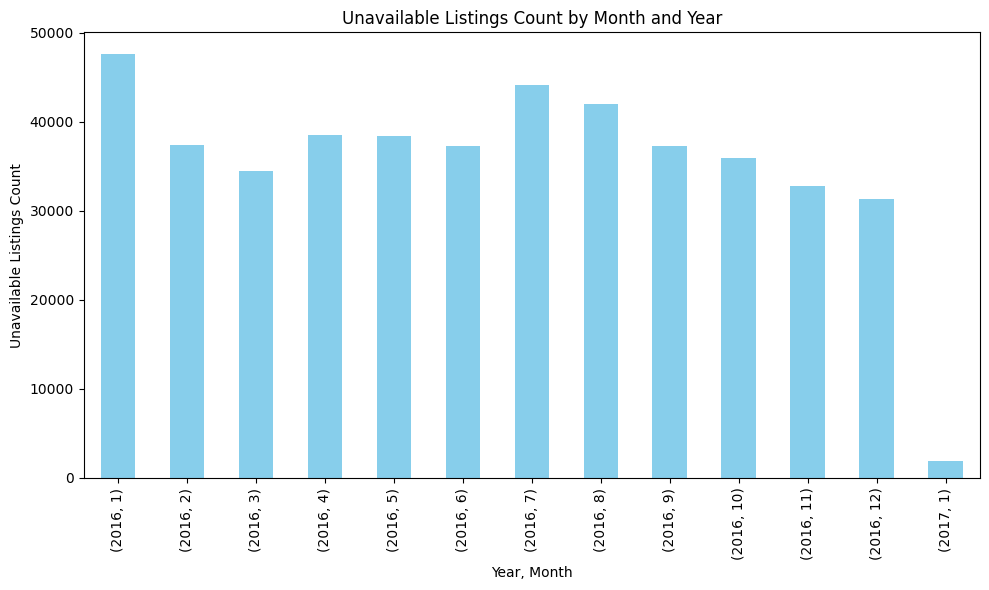

In [185]:
# Visualize Unavailable Listings count throughout the year
# Filter data for unavailable listings
df_useddate = df_calendar[df_calendar['available'] == "f"]

# Group by year and month to count unavailable listings and plot
df_useddate.groupby(['year', 'month'])['available'].count().plot(
    kind="bar", 
    figsize=(10, 6), 
    title="Unavailable Listings Count by Month and Year", 
    color="skyblue", 
    legend=False
);

# Adding axis labels
plt.xlabel("Year, Month")
plt.ylabel("Unavailable Listings Count")
plt.tight_layout()


##### Conlusion: 

The price exhibited an upward trend throughout the year, with noticeable peaks in June, July, and August, reaching its highest point in July.
Conversely, the demand for booking accommodations fluctuated over the year, with January recording the highest number of bookings, followed by July and August.


<unknown>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<ipython-input-186-21a7913b8edb>:3: SyntaxWarning: invalid escape sequence '\$'
  df_listing['price'] = df_listing['price'].replace('[\$,]', '', regex=True).astype(float)


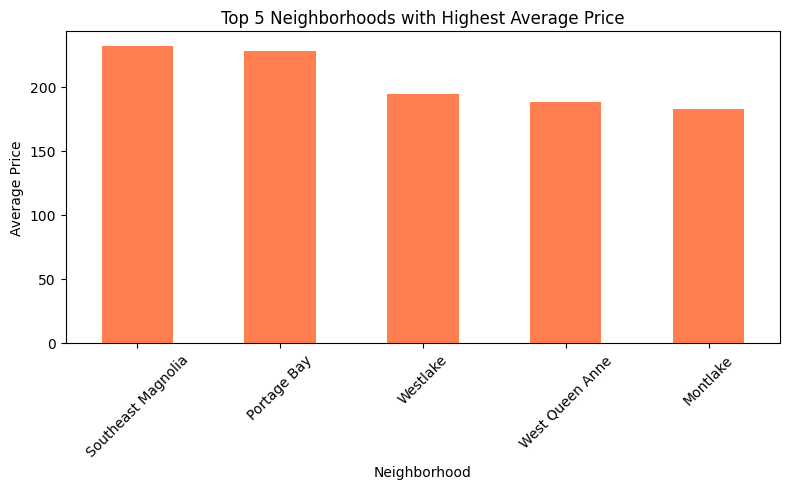

In [186]:
## Showing 5 neighborhood with Highest average price
# Removing the $ sign and converting the price column to float
df_listing['price'] = df_listing['price'].replace('[\$,]', '', regex=True).astype(float)

# Grouping by neighborhood and calculating the average price
top5_highest = (
    df_listing.groupby('neighbourhood_cleansed')['price']
    .mean()
    .sort_values(ascending=False)
    .head()
)

# Plotting the top 5 neighborhoods with the highest average price
top5_highest.plot(
    kind='bar', 
    figsize=(8, 5), 
    color='coral', 
    title='Top 5 Neighborhoods with Highest Average Price'
);

# Adding labels for clarity
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()


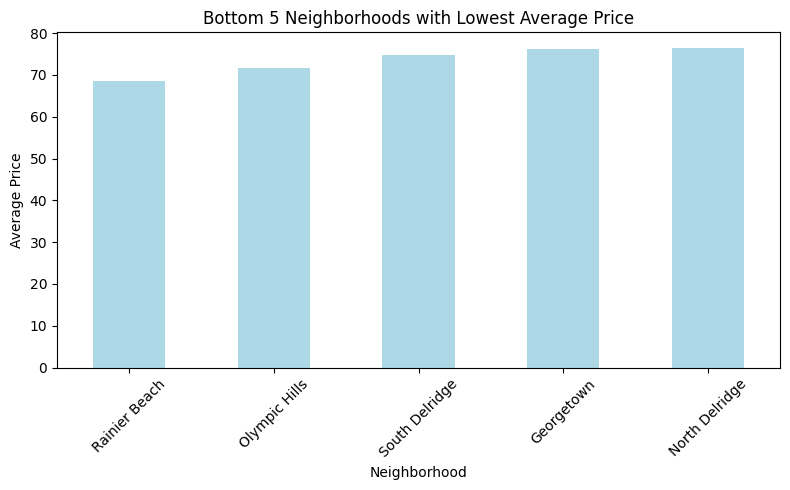

In [187]:
# Showing 10 neighborhood with lowest average price
# Grouping by neighborhood and calculating the average price
bottom5_low = (
    df_listing.groupby('neighbourhood_cleansed')['price']
    .mean()
    .sort_values(ascending=True)  # Sorting in ascending order for clarity
    .head()  # Fetching the bottom 5
)

# Plotting the bottom 5 neighborhoods with the lowest average price
bottom5_low.plot(
    kind='bar', 
    figsize=(8, 5), 
    color='lightblue', 
    title='Bottom 5 Neighborhoods with Lowest Average Price'
);

# Adding labels for clarity
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()


##### Conlusion: 
The neighborhood with the highest average price was Southeast Magnolia, followed by Portage Bay, Westlake, West Queen Anne, and Montlake.
The neighborhoods with the lowest average prices were Rainier Beach, followed by North Delridge, South Delridge, Georgetown, and Olympic Hills.

In [188]:
# Explore property types within neighborhoods and how they impact price (focus on top 5 expensive neighborhoods and property types are house and apartment)

# Filter listings based on the specified neighborhoods
neighborhood = ('Southeast Magnolia', 'Portage Bay', 'Westlake', 'West Queen Anne', 'Montlake')
property = ('Apartment', 'House')

df_listing_1 = df_listing.loc[df_listing['neighbourhood_cleansed'].isin(neighborhood)]

# Further filter based on the property types
df_listing_2 = df_listing_1.loc[df_listing_1['property_type'].isin(property)]

# Grouping by neighborhood and property type to calculate the average price
df_prop = df_listing_2.groupby(['neighbourhood_cleansed', 'property_type'])[['price']].mean().reset_index()

# Display the result
df_prop


,neighbourhood_cleansed,property_type,price
0,Montlake,Apartment,133.333333
1,Montlake,House,191.533333
2,Portage Bay,Apartment,113.833333
3,Portage Bay,House,340.285714
4,Southeast Magnolia,Apartment,219.600000
5,Southeast Magnolia,House,234.100000
6,West Queen Anne,Apartment,128.208333
7,West Queen Anne,House,247.393939
8,Westlake,Apartment,142.400000
9,Westlake,House,168.000000


In [189]:
price_2 = df_prop['price'].values
price_2 = np.reshape(price_2, (5,2))
price_2.shape

(5, 2)

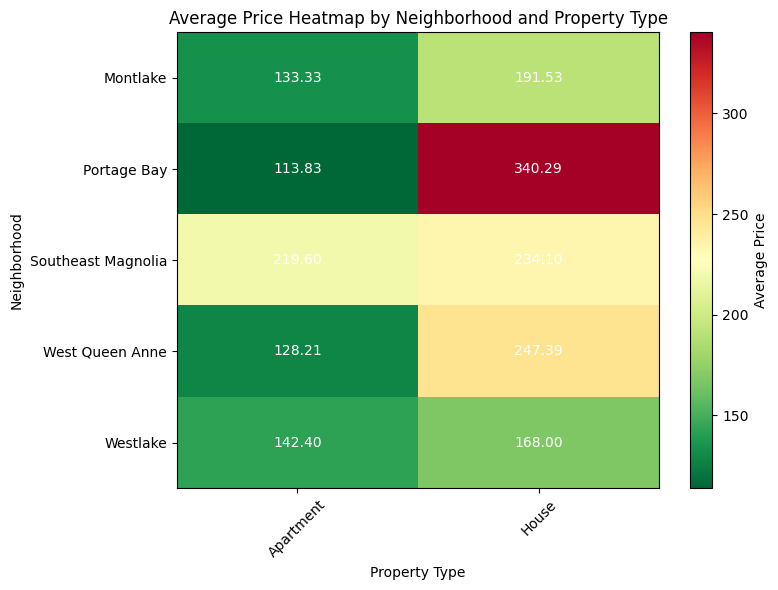

In [190]:
# Heatmap Creation
# Assuming df_prop contains the necessary data
df_heatmap = df_prop.pivot(index='neighbourhood_cleansed', columns='property_type', values='price')

# Create the heatmap using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(df_heatmap, cmap='RdYlGn_r', aspect='auto', interpolation='nearest')

# Adding annotations to the heatmap
for i in range(len(df_heatmap.index)):
    for j in range(len(df_heatmap.columns)):
        plt.text(j, i, f'{df_heatmap.iloc[i, j]:.2f}', ha='center', va='center', color='white')

# Add labels and title for clarity
plt.title('Average Price Heatmap by Neighborhood and Property Type')
plt.xlabel('Property Type')
plt.ylabel('Neighborhood')
plt.xticks(np.arange(len(df_heatmap.columns)), df_heatmap.columns, rotation=45)
plt.yticks(np.arange(len(df_heatmap.index)), df_heatmap.index)
plt.colorbar(label='Average Price')

# Display the heatmap
plt.tight_layout()
plt.show()


##### Conlusion: 
- The focus is mainly on the highest-priced neighborhoods identified in the previous analysis, specifically concentrating on houses and apartments, as they represent a significant portion of the property types.

- The analysis indicates that Portage Bay has the most expensive houses, followed by West Queen Anne and Westlake. Additionally, in Westlake, both houses and apartments are priced similarly.

###  Price Prediction:
Can we forecast the price of a given listing? Which factors associated with the listing are most strongly correlated with the price?

In [191]:
# Finding out records missing in price col:
df_listing['price'].isnull().sum()

0

-> No rows would be eliminated from the dataset

In [192]:
# Create a copy of the original DataFrame
df_list_new = df_listing.copy()

# List of columns to drop that have little impact on price
cols_to_drop = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 
    'license', 'xl_picture_url', 'host_id', 'host_url', 'host_thumbnail_url', 
    'host_verifications', 'street', 'neighbourhood', 'neighbourhood_group_cleansed', 
    'zipcode', 'smart_location', 'country', 'latitude', 'longitude', 'weekly_price', 
    'monthly_price', 'calendar_updated', 'calendar_last_scraped', 'first_review', 
    'last_review', 'calculated_host_listings_count', 'reviews_per_month'
]

# Drop the irrelevant columns
df_list_new = df_list_new.drop(cols_to_drop, axis=1)

# Check the shape of the new DataFrame after dropping the columns
df_list_new.shape


(3818, 64)

In [193]:
# Review all the numerical columns and assess missing values
numerical_cols = df_list_new.select_dtypes(include=['float', 'int']).columns
for col in numerical_cols:
    print(col,df_list_new[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
accommodates 0
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656


#### Conclusion:

- Bathrooms: There are 16 records with missing values for bathrooms. Since this is a small percentage, we will set the missing values to 0.
- Bedrooms: For rows where the bedroom field is blank, since all have at least one bed, we will fill the missing values with 1.
- Beds: There is one record with a missing value for beds, but the bed type is specified as "Real Bed." We will set the value of beds to 1 for this record.
- Square Feet: Since most values in the square_feet column are missing, we will drop this column entirely.
- Review Scores: All review-related score columns with missing values will be set to 0, assuming these listings have no review scores.
- Host Listings Count: For the two rows with missing values in the host listings columns, we will fill these with 1, as these host IDs are associated with only one listing each.

In [194]:
# Fill NaN values in the bathrooms column with 0
df_list_new['bathrooms'] = df_list_new['bathrooms'].fillna(0)
# Fill NaN values in the bedrooms column with 1 (since all rows with blank bedroom field have at least 1 bed)
df_list_new['bedrooms'] = df_list_new['bedrooms'].fillna(1)
# For the 1 record where beds is NaN and bed_type is 'Real Bed', set 'beds' to 1
df_list_new['beds'] = df_list_new['beds'].fillna(1)
# Drop the square_feet column as most of its values are NaN
df_list_new = df_list_new.drop('square_feet',axis=1)
# Set all NaN values in review_scores columns to 0 (assuming no review scores for these listings)
cols_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_0:
    df_list_new[col] = df_list_new[col].fillna(0)


df_list_new['host_listings_count'] = df_list_new['host_listings_count'].fillna(1)
df_list_new['host_total_listings_count'] = df_list_new['host_total_listings_count'].fillna(1)

In [195]:
# Review all the categorical columns and assess missing values

categorical_cols = df_list_new.select_dtypes(include=['object']).columns
for col in categorical_cols:
        print(col,df_list_new[col].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
picture_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
state 0
market 0
country_code 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


#### Conclusion:

- Summary, Space, Neighborhood Overview, Notes, Transit: These are categorical fields describing the property -> converted into boolean fields.

- Host-related fields: host_name, host_since, host_location, host_about, host_picture_url, host_neighbourhood are categorical fields describing the host -> converted into boolean fields.

- Host Response and Acceptance Rate -> assign "N/A" where the value is missing (NaN).

- Host Response Rate: This should be a numerical field --> Convert host_response_rate to a float, and replace "N/A" or blanks with 0.

- Host Details: For host_is_superhost, host_has_profile_pic, and host_identity_verified, assign 1 for True (t), 0 for False (f), and replace missing values (NaN) with 0.

- Property Type: Drop records value is 0.

- Security Deposit and Cleaning Fee: Remove the $ signs, convert them to floats. If cleaning_fee is missing, assume the value is 0.

Fields to Clean:

- Convert name, description, and picture_url into boolean fields.
- Drop the experiences_offered column.
- Drop the market column.
- Convert is_location_exact, has_availability, requires_license, instant_bookable, require_guest_profile_picture, and require_guest_phone_verification fields from t/f values to 1/0.
- Extra People: Remove the $ sign from extra_people and convert it to a float.

- Drop the jurisdiction_names column.

- City and State: Convert all city names in the city column to lowercase and remove extra spaces. Similarly, convert all state names in the state column to lowercase.

- The amenities field contains a list of values for each row and needs to be handled accordingly (perhaps splitting the list or encoding the information).


#### Change all text fields to boolean

In [196]:
def boolean_change(data_input):
    '''
    This function converts fields into 1/0 (t/f) to indicate whether the field has data or not.
    If data_input is empty, NaN, or None, return 0. Otherwise, return 1.
    '''
    # Check if data_input is NaN, None, or empty
    if pd.isna(data_input) or data_input == '':
        return 0
    else:
        return 1

# List of host fields to convert
host_fields = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'name', 'description', 'picture_url',
               'host_name', 'host_since', 'host_location', 'host_about', 'host_picture_url', 'host_neighbourhood']

# Apply the boolean_change function to each specified field
for t in host_fields:
    df_list_new[t] = df_list_new[t].apply(boolean_change)


#### Convert all boolean fields to 1/0

In [197]:
def boolean_change_10(boolean_data):
    ''' 
    This function converts boolean fields into 1/0 based on their values.
    If the value is 't' (True), it returns 1; otherwise, it returns 0.
    '''
    if pd.isna(boolean_data):  # Check for NaN values
        return 0
    elif boolean_data == 't':
        return 1
    else:
        return 0

# List of boolean fields to convert
boolean_fields = [
    'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
    'is_location_exact', 'has_availability', 'requires_license', 
    'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification'
]

# Apply the function to the specified fields
for t in boolean_fields:
    df_list_new[t] = df_list_new[t].apply(boolean_change_10)


In [198]:
# Assign N/A where values are missing
df_list_new['host_response_time'] = df_list_new['host_response_time'].fillna('N/A')
df_list_new['host_acceptance_rate'] = df_list_new['host_acceptance_rate'].fillna('N/A')

# For 'host_response_rate', replace 'N/A' with 0, remove percentage signs, and convert to float
df_list_new['host_response_rate'] = df_list_new['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
df_list_new['host_response_rate'] = df_list_new['host_response_rate'].replace(r'[\%,]', '', regex=True).astype(float)
df_list_new['host_response_rate'] = df_list_new['host_response_rate'].fillna(0)

# Drop rows with missing values in the 'property_type' column
df_list_new = df_list_new.dropna(subset=['property_type'], axis=0)

# Remove $ sign and assign 0 to missing values in financial columns
df_list_new['security_deposit'] = df_list_new['security_deposit'].replace(r'[\$,]', '', regex=True).astype(float)
df_list_new['cleaning_fee'] = df_list_new['cleaning_fee'].replace(r'[\$,]', '', regex=True).astype(float)
df_list_new['extra_people'] = df_list_new['extra_people'].replace(r'[\$,]', '', regex=True).astype(float)
df_list_new['security_deposit'] = df_list_new['security_deposit'].fillna(0)
df_list_new['cleaning_fee'] = df_list_new['cleaning_fee'].fillna(0)
df_list_new['extra_people'] = df_list_new['extra_people'].fillna(0)

# Drop unnecessary columns
df_list_new = df_list_new.drop(['experiences_offered', 'market', 'jurisdiction_names'], axis=1)

# Lowercase and trim spaces for city and state fields
df_list_new['city'] = df_list_new['city'].str.lower().str.strip()
df_list_new['state'] = df_list_new['state'].str.lower().str.strip()


In [199]:
# Handle amenities
amenities = []
split_list = []
for index, row in df_list_new.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    split_list = row['amenities'].split(',')
    for l in split_list:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),
 ('Family/Kid Friendly', 1962),
 ('First Aid Kit', 1679),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 885),
 ('Pets live on this property', 882),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 508),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 50),
 ('

In [200]:
amenities_new =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new:
    c_col,c_desc = c.split('|')
    df_list_new[c_col] = df_list_new['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [201]:
# Drop the original amenities column
df_list_new = df_list_new.drop('amenities', axis = 1)

In [202]:
# Dummies for categorical columns
categorical_fields = df_list_new.select_dtypes(include=['object']).columns

df_list_new = pd.get_dummies(df_list_new, columns=categorical_fields)
df_list_new.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,0,1,1,0,0,0,1,1,1,...,False,False,False,False,False,False,True,False,True,False
1,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,True,False,False,True
2,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,True,False,False,True
3,1,1,0,1,0,0,0,1,1,1,...,False,False,False,False,False,False,True,True,False,False
4,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,True,False,False,True


#### Modeling:

In [203]:
# Dependent Y as Price, Independent X as other columns
y = df_list_new['price']
X = df_list_new.drop(['price'], axis=1)

In [204]:
# Train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2671, 190) (2671,)
(1146, 190) (1146,)


In [205]:
# Instantiate a StandardScaler for feature scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate linear regression model
lm_model = LinearRegression()

# Fit the model to the scaled training data
lm_model.fit(X_train_scaled, y_train)

# Predict and score the model
y_train_preds = lm_model.predict(X_train_scaled)
y_test_preds = lm_model.predict(X_test_scaled)

# Compute R-squared for training and testing data
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

print("The training data r-squared {}. The test data was {}.".format(train_score, test_score))


The training data r-squared 0.6256103768636725. The test data was 0.6206469323065065.


In [207]:
def coef_cal(coefficients, X_train):
    
    df_coef = pd.DataFrame()
    df_coef['est_int'] = X_train.columns
    df_coef['coefs'] = lm_model.coef_
    df_coef['absolute_coefs'] = np.abs(lm_model.coef_)
    df_coef = df_coef.sort_values('absolute_coefs', ascending=False)
    return df_coef


df_coef = coef_cal(lm_model.coef_, X_train)


df_coef.head(10)

,est_int,coefs,absolute_coefs
67,host_acceptance_rate_100%,9.801671e+14,9.801671e+14
68,host_acceptance_rate_N/A,9.795218e+14,9.795218e+14
65,host_response_time_within an hour,-7.666602e+14,7.666602e+14
64,host_response_time_within a few hours,-6.732420e+14,6.732420e+14
63,host_response_time_within a day,-5.571046e+14,5.571046e+14
61,host_response_time_N/A,-5.357694e+14,5.357694e+14
172,property_type_House,5.269679e+14,5.269679e+14
163,property_type_Apartment,5.245997e+14,5.245997e+14
186,bed_type_Real Bed,-4.532228e+14,4.532228e+14
158,city_seattle,-4.221257e+14,4.221257e+14


#### Conlusion:

After modeling the data, both the training and test datasets has an R-squared value of 0.62. The coefficient analysis shows that the most influential factors on the price were a combination of host details and descriptive listing information, including fields such as host acceptance rate, host response time, property type, bed type.